<a href="https://colab.research.google.com/github/coderhetal/NLP/blob/main/CBOW_IMPLEMENTATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as Fun

In [ ]:
text = '''Artificial intelligence (AI) is intelligence—perceiving,
 synthesizing, and inferring information—demonstrated by machines, 
 as opposed to intelligence displayed by non-human animals and humans.
 Example tasks in which this is done include speech recognition, computer 
 vision, translation between (natural) languages, as well as other mappings of inputs.'''.split()


In [ ]:

vocab = set(text)
vocab_size = len(vocab)

word_to_index = {w: index for (index, w) in enumerate(vocab)}
index_to_word = {index: w for (index, w) in enumerate(vocab)}

print(word_to_index)
print(index_to_word)

{'by': 0, 'mappings': 1, '(natural)': 2, 'synthesizing,': 3, 'which': 4, 'in': 5, 'languages,': 6, 'computer': 7, 'is': 8, 'of': 9, 'this': 10, 'Example': 11, 'tasks': 12, 'inputs.': 13, 'well': 14, 'non-human': 15, 'machines,': 16, 'recognition,': 17, 'done': 18, 'intelligence—perceiving,': 19, 'displayed': 20, 'humans.': 21, 'between': 22, '(AI)': 23, 'speech': 24, 'inferring': 25, 'to': 26, 'translation': 27, 'animals': 28, 'vision,': 29, 'other': 30, 'Artificial': 31, 'and': 32, 'information—demonstrated': 33, 'as': 34, 'intelligence': 35, 'include': 36, 'opposed': 37}
{0: 'by', 1: 'mappings', 2: '(natural)', 3: 'synthesizing,', 4: 'which', 5: 'in', 6: 'languages,', 7: 'computer', 8: 'is', 9: 'of', 10: 'this', 11: 'Example', 12: 'tasks', 13: 'inputs.', 14: 'well', 15: 'non-human', 16: 'machines,', 17: 'recognition,', 18: 'done', 19: 'intelligence—perceiving,', 20: 'displayed', 21: 'humans.', 22: 'between', 23: '(AI)', 24: 'speech', 25: 'inferring', 26: 'to', 27: 'translation', 28: 

In [ ]:
data = []
labels = []
n = 0
for i in range(2, len(text) - 2):
  n +=1
  context_vec = [word_to_index[text[i - 2]], word_to_index[text[i - 1]],
                word_to_index[text[i + 1]], word_to_index[text[i + 2]]]
  context_vec = torch.tensor(context_vec, dtype=torch.long)
  context = Fun.one_hot(context_vec, num_classes = vocab_size)
  context = torch.sum(context, dim = 0, keepdim = True)
  target = torch.tensor(word_to_index[text[i]])
  labels.append(target)
  target = Fun.one_hot(target, num_classes = vocab_size)
  data.append((context, target))
print(n)

40


In [ ]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
      super(CBOW, self).__init__()
      self.L1 = nn.Linear(vocab_size, embedding_dim, bias = False)
      self.L3 = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
      out = Fun.relu(self.L1(x))
      out = Fun.softmax(self.L3(out), dim = 1)
      return out

In [ ]:
model = CBOW(vocab_size, 32)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
loss_func = []
accuracy = []

for i in range(0,200):
  loss = 0
  acc = 0
  for k, (context, target) in enumerate(data):
    output = model(context.float())
    loss += criterion(output.squeeze(0), target.float())
    _, predicted = torch.max(output.data , 1)
    if(predicted == labels[k]):
      acc += 1
  loss_func.append(float(loss))
  accuracy.append(acc/n*100)
  if(i%10 == 0):
    print(loss)
    print(acc/n*100)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor(145.5397, grad_fn=<AddBackward0>)
0.0
tensor(144.3951, grad_fn=<AddBackward0>)
32.5
tensor(138.6757, grad_fn=<AddBackward0>)
50.0
tensor(127.3124, grad_fn=<AddBackward0>)
72.5
tensor(116.8836, grad_fn=<AddBackward0>)
85.0
tensor(111.5670, grad_fn=<AddBackward0>)
92.5
tensor(110.6289, grad_fn=<AddBackward0>)
92.5
tensor(110.3750, grad_fn=<AddBackward0>)
92.5
tensor(109.6115, grad_fn=<AddBackward0>)
95.0
tensor(109.4138, grad_fn=<AddBackward0>)
95.0
tensor(109.3070, grad_fn=<AddBackward0>)
95.0
tensor(109.0342, grad_fn=<AddBackward0>)
95.0
tensor(108.3702, grad_fn=<AddBackward0>)
97.5
tensor(108.3156, grad_fn=<AddBackward0>)
97.5
tensor(108.2998, grad_fn=<AddBackward0>)
97.5
tensor(108.2951, grad_fn=<AddBackward0>)
97.5
tensor(108.2912, grad_fn=<AddBackward0>)
97.5
tensor(108.2880, grad_fn=<AddBackward0>)
97.5
tensor(108.2855, grad_fn=<AddBackward0>)
97.5
tensor(108.2834, grad_fn=<AddBackward0>)
97.5


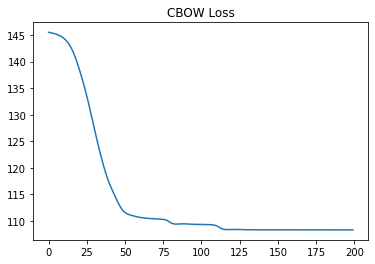

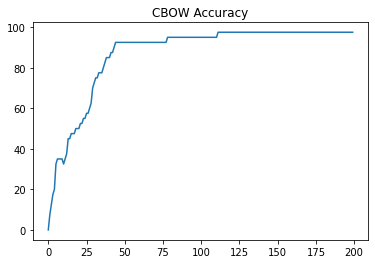

In [ ]:
plt.plot(loss_func)
plt.title("CBOW Loss")
plt.show()
plt.plot(accuracy)
plt.title("CBOW Accuracy")
plt.show()

In [ ]:

txt = input('Enter a text : ')
txt1 = txt.split()
vec = [word_to_index[txt1[0]], word_to_index[txt1[1]], word_to_index[txt1[2]], word_to_index[txt1[3]]]
vec = torch.tensor(vec, dtype = torch.long)
cntxt = Fun.one_hot(vec, num_classes = vocab_size)
cntxt = torch.sum(cntxt, dim = 0, keepdim = True)
output = model(cntxt.float())
_, predicted = torch.max(output.data , 1)
print('Predicted : ', index_to_word[int(predicted)])

KeyboardInterrupt: ignored

In [ ]:
for name, param in model.named_parameters():
  if 'L1.weight' in name:
    embed = param.detach().numpy()
    embed = embed.T
    print('Embedding shape : ', embed.shape)
    print(embed)

Embedding shape :  (38, 32)
[[ 0.52452797 -0.28557217  0.7030672  ...  0.65564924  0.4290696
   0.6906217 ]
 [ 0.6302486  -0.04244602  0.365474   ... -0.02744117  0.47358236
   0.39210248]
 [ 0.0407571  -0.48171958 -0.3449449  ... -0.38916752 -0.7759368
  -0.690394  ]
 ...
 [-0.05889983  0.8762915   0.43384907 ...  0.45970446  0.6975603
  -0.8498273 ]
 [ 0.7567948   0.2679356  -0.04696415 ...  0.7102036   0.6001923
   0.4986135 ]
 [ 0.22058953  0.26743212  0.79093283 ...  0.11354476 -0.44879603
   0.5658631 ]]


In [ ]:
w1 = input('Enter word-1 : ')
w2 = input('Enter word-2 : ')
w3 = input('Enter word-3 : ')
cos_dist1 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w2]])
cos_dist2 = np.dot(embed[word_to_index[w2]], embed[word_to_index[w3]])
cos_dist3 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w3]])
print('The cosine distance between word-1 and word-2 is : ', cos_dist1)
print('The cosine distance between word-2 and word-3 is : ', cos_dist2)
print('The cosine distance between word-1 and word-3 is : ', cos_dist3)

In [ ]:
def PCA(embedding):
  corr = np.corrcoef(embedding)
  values,vectors = np.linalg.eig(corr)
  args = (-values).argsort()
  values = vectors[args]
  vectors = vectors[:, args]
  new_vectors=vectors[:,:2]
  return np.multiply(embedding[:,:2], new_vectors)

(38, 2)


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:690: ComplexWarning: Casting complex values t

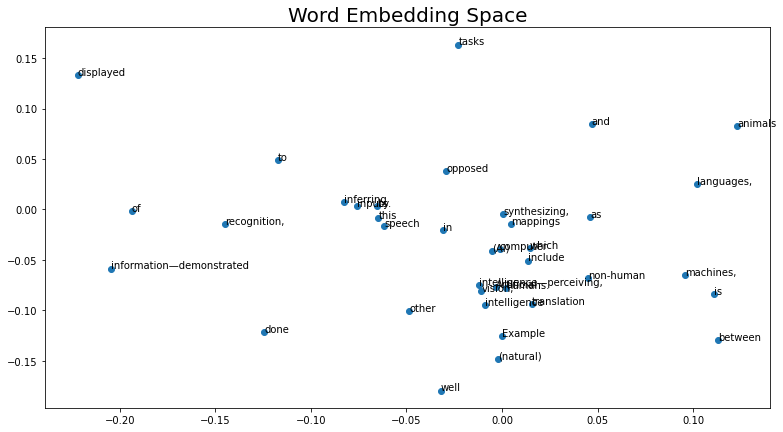

In [ ]:
pca = PCA(embed)
print(pca.shape)
plt.figure(figsize=(13,7))
plt.scatter(pca[:,0], pca[:,1])
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(pca[i,0],pca[i,1]))